## Ultimate Data Analysis Interview Challenge

Adam Nunley

Springboard 2021

### Part 1

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')

In [61]:
logins = pd.read_json('logins.json')
logins.set_index(logins.login_time, inplace = True)

In [62]:
logins_15 = logins.login_time.resample('15min').count()

Text(0.5, 1.0, 'Logins per 15 minutes - Entire Dataset')

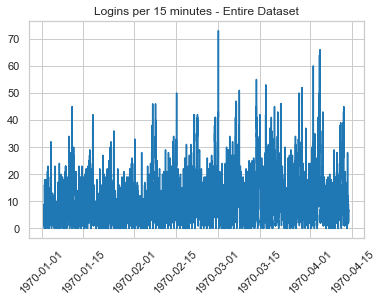

In [63]:
plt.plot(logins_15)
plt.xticks(rotation = 45)
plt.title('Logins per 15 minutes - Entire Dataset')

(array([1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

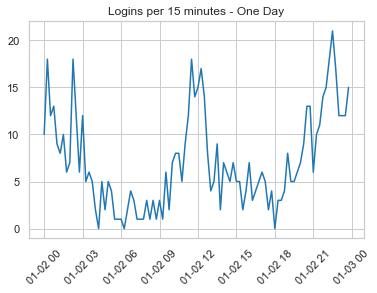

In [64]:
plt.plot(logins_15['1970-01-02'])
plt.title('Logins per 15 minutes - One Day')
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Logins per 15 minutes - One Week')

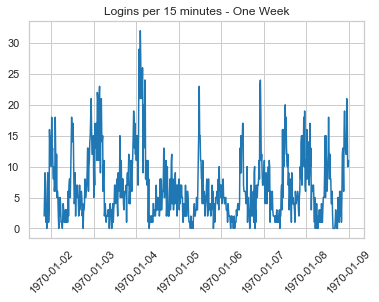

In [65]:
plt.plot(logins_15['1970-01-01': '1970-01-08'])
plt.xticks(rotation = 45)
plt.title('Logins per 15 minutes - One Week')

In [66]:
logins_df = pd.DataFrame(logins_15)
logins_df['quarter_hour'] = logins_df.index.time
logins_df['weekday'] = logins_df.index.dayofweek

In [67]:
quarter_hour_means = logins_df.groupby('quarter_hour')['login_time'].mean()
quarter_hour_means.index = quarter_hour_means.index.astype(str)

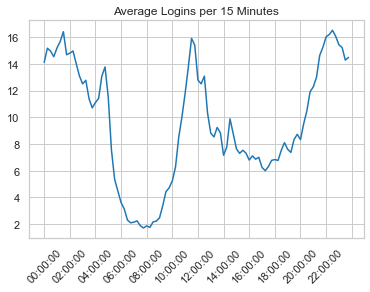

In [68]:
import matplotlib.ticker as ticker

tick_spacing = 8

fig, ax = plt.subplots(1,1)
ax.plot(quarter_hour_means)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.title('Average Logins per 15 Minutes')
plt.show()

In [69]:
weekday_quarter_hour_means = logins_df.groupby(['quarter_hour', 'weekday'])['login_time'].mean().unstack()
weekday_quarter_hour_means.index = weekday_quarter_hour_means.index.astype(str)

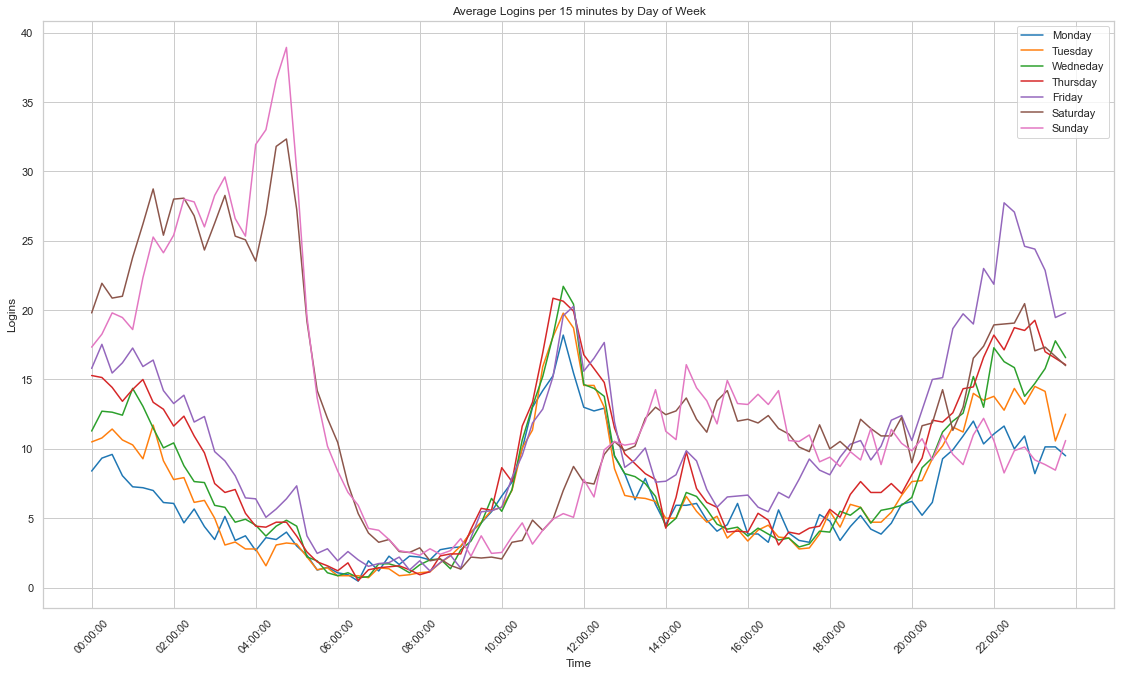

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (19.2, 10.8))
ax.plot(weekday_quarter_hour_means)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.legend(['Monday', 'Tuesday', 'Wedneday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Logins per 15 minutes by Day of Week')
plt.xlabel('Time')
plt.ylabel('Logins')
plt.show()

The above chart reflects the relevant cycles of Ultimate's user demand. On weekdays, there is an abrupt spike in demand around the middle of the day with consistently high demand during the night; on Friday, the evening demand begins earlier and remains higher than any other weekday. On weekends, demand is low in the morning, moderate in the afternoon and evening, and extremely high during the late night. 

### Part 2

In order to test the effectiveness of Ultimate's toll fee reimbursement program, I would create a new binary variable for every ride called 'bridge_crossed' that is set to True if the ride began and ended in different cities or if the driver's prior ride ended in a different city than the observed ride began. A count of this variable would be used as the key measure of success, because it directly reflects the number of drivers who are crossing the bridge to either complete rides or start new rides.

To implement the experiment, I would begin the compensation program and then record the total daily count of 'bridge_crossed' for three months. I would then make the convert the counts to proportions of total daily rides and compare that distribution of proportions to the distribution of proportions from the same time period the previous year. A t-test would then determine whether the sets of observations are likely to come from different underlying distributions or not. If they are different, the compensation program has probably had an effect. At this point, an average change in bridge crossing could be calculated to determine a final measure of the program's success. The only caveat I would include is that an increase in bridge crossings does not imply an increase in profit for Ultimate, so another analysis that determines the profit lost or gained by the program is probably also necessary.

### Part 3

In [71]:
ultimate_df = pd.read_json('ultimate_data_challenge.json')
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [72]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [73]:
ultimate_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [84]:
ultimate_df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

(array([1.8100e+02, 4.0000e+00, 1.2600e+02, 3.2000e+01, 5.0000e+00,
        6.5600e+02, 5.2400e+02, 2.0800e+03, 4.6440e+03, 4.1547e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

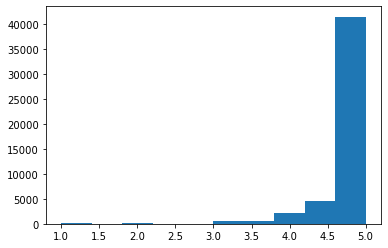

In [73]:
plt.hist(ultimate_df.avg_rating_by_driver)

(array([4.7232e+04, 2.4750e+03, 2.4400e+02, 3.9000e+01, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.   ,  16.096,  32.192,  48.288,  64.384,  80.48 ,  96.576,
        112.672, 128.768, 144.864, 160.96 ]),
 <BarContainer object of 10 artists>)

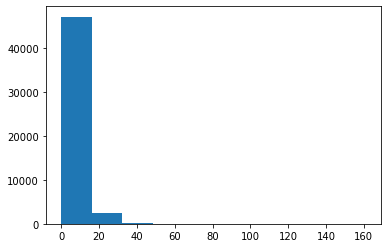

In [74]:
plt.hist(ultimate_df.avg_dist)

(array([ 9244.,   503.,  1565.,  2419.,  2005.,  6098.,  4822.,  3265.,
         2650., 17429.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

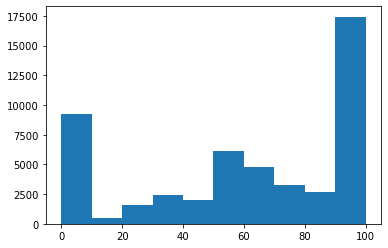

In [75]:
plt.hist(ultimate_df.weekday_pct)

(array([3.8048e+04, 4.1320e+03, 2.8500e+03, 1.5250e+03, 3.5400e+02,
        1.4050e+03, 2.1500e+02, 3.9000e+01, 1.6000e+01, 1.4160e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

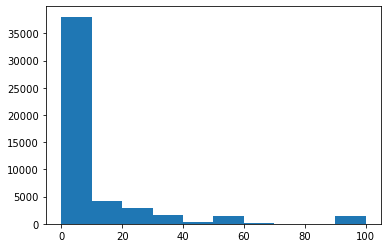

In [76]:
plt.hist(ultimate_df.surge_pct)

(array([4.8841e+04, 8.5800e+02, 2.3400e+02, 3.8000e+01, 1.7000e+01,
        1.0000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

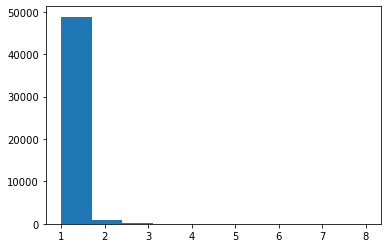

In [77]:
plt.hist(ultimate_df.avg_surge)

(array([2.560e+02, 7.000e+00, 2.180e+02, 1.200e+02, 1.000e+02, 1.404e+03,
        1.452e+03, 4.846e+03, 5.415e+03, 2.806e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

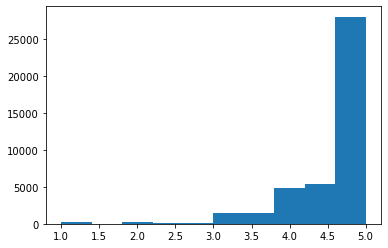

In [78]:
plt.hist(ultimate_df.avg_rating_of_driver)

(array([4.875e+04, 1.043e+03, 1.600e+02, 3.200e+01, 1.100e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
        112.5, 125. ]),
 <BarContainer object of 10 artists>)

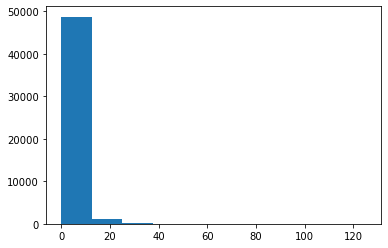

In [79]:
plt.hist(ultimate_df.trips_in_first_30_days)

In [74]:
ultimate_df.avg_rating_of_driver[ultimate_df.avg_rating_of_driver.isnull()] = ultimate_df.avg_rating_of_driver.mean()

<ipython-input-74-667ced1dbcc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_df.avg_rating_of_driver[ultimate_df.avg_rating_of_driver.isnull()] = ultimate_df.avg_rating_of_driver.mean()


In [75]:
ultimate_df.avg_rating_by_driver[ultimate_df.avg_rating_by_driver.isnull()] = ultimate_df.avg_rating_by_driver.mean()

<ipython-input-75-ba393f897210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_df.avg_rating_by_driver[ultimate_df.avg_rating_by_driver.isnull()] = ultimate_df.avg_rating_by_driver.mean()


In [76]:
ultimate_df = ultimate_df[ultimate_df.phone.notnull()]

In [77]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [78]:
from datetime import timedelta

thirty_days_prior = pd.to_datetime(max(ultimate_df.last_trip_date)) - timedelta(30)

ultimate_df['retained'] = (pd.to_datetime(ultimate_df.last_trip_date) >= thirty_days_prior)
ultimate_df['retained'][ultimate_df['retained'] == True] = 1
ultimate_df['retained'][ultimate_df['retained'] == False] = 0

<ipython-input-78-7396dbe0d91f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_df['retained'][ultimate_df['retained'] == True] = 1


In [79]:
ultimate_df['ultimate_black_user'][ultimate_df['ultimate_black_user'] == True] = 1
ultimate_df['ultimate_black_user'][ultimate_df['ultimate_black_user'] == False] = 0

In [80]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1.0,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0.0,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0.0,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1.0,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0.0,82.4,3.13,4.9,0.0


In [81]:
ultimate_df.retained.value_counts(normalize =True)

0.0    0.623599
1.0    0.376401
Name: retained, dtype: float64

In [151]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix,classification_report, roc_curve, log_loss, brier_score_loss, roc_auc_score, make_scorer
from timeit import default_timer as timer

pd.set_option('display.max_columns', 25)

In [152]:
# Custom loss function - Binned Sum of Squared Residuals

def binned_sum_of_squared_residuals(y_actual, y_predicted):

    df = pd.DataFrame(y_actual.copy())
    df.columns = ['Actual']
    df['Predicted Probability'] = y_predicted

    bins = np.arange(0,1.05,0.05)
    labels = ['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5',
              '0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1']
    df['Bin'] = pd.cut(df['Predicted Probability'], bins = bins, labels = labels)
    bin_df = df.groupby('Bin')['Actual', 'Predicted Probability'].mean()
    bin_df.reset_index(inplace = True)
    bin_df.columns = ['Bin', 'Actual', 'Predicted']

    binned_sum_of_squares = sum(((bin_df.Actual - bin_df.Predicted).fillna(0)*100) ** 2)
    
    return binned_sum_of_squares

# wrapper for grid search object
bssr = make_scorer(binned_sum_of_squared_residuals, 
                   greater_is_better = False,
                   needs_proba = True)

In [153]:
# Scoring function - Proba Under 30

def proba30(y_actual, y_predicted):
    
    proba30 = sum(y_predicted[y_predicted < .3])/len(y_predicted)
    
    return proba30

# wrapper for grid search object
proba30 = make_scorer(proba30, 
                   greater_is_better = True,
                   needs_proba = True)

In [154]:
# Preprocessing Function

def preprocess(X_categorical, X_numerical, y):

    start_preprocessing = timer()

    #Create dummy columns for categorical features
    X = pd.get_dummies(X_categorical, drop_first = True)

    #Add numerical features to model dataframe
    X = pd.concat([X, X_numerical], axis = 1)

    #Scale features
    X = pd.DataFrame(StandardScaler().fit_transform(X), index = X.index, columns = X.columns)

    #Create validation test set to reserve for final validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 33)

    end_preprocessing = timer()
    print('Preprocessing Time:', round(end_preprocessing - start_preprocessing,1), 'seconds')
    
    return X_train, X_test, y_train.astype('int'), y_test.astype('int')

In [155]:
# Training Function

def train(model, X_train, y_train):
    
    start_training = timer()

    model.fit(X_train, np.ravel(y_train))

    end_training = timer()
    print('Training Time:', round(end_training - start_training,1), 'seconds')

In [156]:
# Prediction Function

def predict(model, X_validation):
    
    start_prediction = timer()

    y_pred = pd.DataFrame(model.predict(X_validation), index = X_validation.index)
    y_pred_prob = pd.DataFrame(model.predict_proba(X_validation)[:,1], index = X_validation.index)

    end_prediction = timer()
    print('Prediction Time:', round(end_prediction - start_prediction,1), 'seconds')
    
    return y_pred, y_pred_prob

In [175]:
# Reporting Function

def reports(model, X_columns, y_validation, y_pred, y_pred_prob):

    start_reports = timer()

    print('Confusion Matrix:\n', confusion_matrix(y_validation, y_pred))
    print('Classification Report:\n', classification_report(y_validation, y_pred))
    print('Accuracy:', round((sum(y_pred.iloc[:,0] == y_validation.iloc[:,0]) / len(y_pred.values) * 100),2), "%")
    print('Log Loss:', log_loss(y_validation, y_pred_prob))
    print('Brier Score Loss:', brier_score_loss(y_validation, y_pred_prob))

    fpr, tpr, thresholds = roc_curve(y_validation, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    print('ROC AUC Score:', roc_auc_score(y_validation, y_pred_prob))
    
    if isinstance(model, (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier)):
    
        forest_feature_importance = pd.DataFrame(zip(X_columns,model.feature_importances_))
        forest_feature_importance.sort_values(1, inplace = True)
        forest_feature_importance.reset_index(inplace = True, drop = True)

        plt.bar(forest_feature_importance[0][-20:],forest_feature_importance[1][-20:])
        plt.xticks(rotation = 'vertical')
        plt.title('20 Largest Importances')
        plt.show()

        plt.bar(forest_feature_importance[0][0:20],forest_feature_importance[1][0:20])
        plt.xticks(rotation = 'vertical')
        plt.title('20 Smallest Importances')
        plt.show()
        
    elif isinstance(model, (LogisticRegression, SGDClassifier)):
        
        feature_coef = pd.DataFrame(zip(X_columns,model.coef_[0]))
        feature_coef.sort_values(1, inplace = True)
        feature_coef.reset_index(inplace = True, drop = True)

        plt.bar(feature_coef[0][-20:],feature_coef[1][-20:])
        plt.xticks(rotation = 'vertical')
        plt.title('20 Largest Feature Coefficients')
        plt.show()

        plt.bar(feature_coef[0][0:20],feature_coef[1][0:20])
        plt.xticks(rotation = 'vertical')
        plt.title('20 Smallest Feature Coefficients')
        plt.show()

    proba_df = y_validation.copy()
    proba_df['Predicted Probability'] = y_pred_prob

    #The below bins by Predicted Probability
    bins = np.arange(0,1.05,0.05)
    labels = ['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5',
              '0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1']
    proba_df['Bin'] = pd.cut(proba_df['Predicted Probability'], bins = bins, labels = labels)
    chart_df = proba_df.groupby('Bin')['retained', 'Predicted Probability'].mean()
    chart_df['Count'] = proba_df.groupby('Bin')['retained'].count()
    chart_df.reset_index(inplace = True)
    chart_df.columns = ['Bin', 'Actual', 'Predicted', 'Count']

    print(chart_df)

    plt.bar(chart_df.Bin, chart_df.Count)
    plt.xticks(rotation = 45)
    plt.title('Frequency of Test Observations by Proba')
    plt.xlabel('Observation Proba')
    plt.ylabel('Number of Observations')
    plt.show()

    plt.scatter(chart_df.Bin, chart_df.Actual, label = 'Actual', alpha = 1)
    plt.scatter(chart_df.Bin, chart_df.Predicted, color = 'r', marker = 'D', label = 'Predicted', alpha = 0.75)
    plt.legend()
    plt.title('Actual and Predicted Label 1 Rate by 5% Bin')
    plt.xticks(rotation = 45)
    plt.xlabel('Bin')
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.ylabel('Clearance Rate')
    plt.show()

    plt.scatter(chart_df.Predicted, chart_df.Actual)
    plt.plot([0,1],[0,1], linestyle = '--', color = 'g')
    plt.title('Actual vs. Predicted Label 1 Rate by 5% bin')
    plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],rotation = 45)
    plt.xlabel('Predicted')
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.ylabel('Actual')
    plt.show()

    plt.bar(chart_df.Bin, chart_df.Actual - chart_df.Predicted,)
    plt.title('Actual - Predicted Label 1 Rate by 5% Bin')
    plt.xticks(rotation = 45)
    plt.xlabel('Bin (Range = Value - 5% to Value)')
    plt.ylabel('Delta Rate')
    plt.show()

    print('Sum of Squared Binned Residuals:', binned_sum_of_squared_residuals(y_validation, y_pred_prob))

    end_reports = timer()
    print('Reporting Time:', round(end_reports - start_reports,1), 'seconds')
    
    return proba_df, chart_df

In [83]:
# Divide categorical and numerical features for preprocessing function
X_categorical = ultimate_df[[
                        'city',
                        'phone',
                        'ultimate_black_user'
                            ]].reset_index(drop = True)
                        #excluding 'last_trip_date' after using it to generate y variable


X_numerical = ultimate_df[[
                        'avg_dist',
                        'avg_rating_by_driver',
                        'avg_rating_of_driver',
                        'surge_pct',
                        'avg_surge',
                        'trips_in_first_30_days',
                        'weekday_pct'
                        ]].reset_index(drop = True)

#Create y series for preprocessing function
y = pd.DataFrame(ultimate_df.retained).reset_index(drop = True)

#Encode, Scale, Train-Test-Split
X_train, X_test, y_train, y_test = preprocess(X_categorical, X_numerical, y)

NameError: name 'preprocess' is not defined

In [159]:
scoring = {'precision_weighted' : 'precision_weighted',
           'recall_weighted' : 'recall_weighted',
           'roc_auc' : 'roc_auc',
           'f1_weighted' : 'f1_weighted',
           'accuracy' : 'accuracy',
           'bssr' : bssr,
           'proba30' : proba30}

In [160]:
def grid_search(grid, model, X_train, y_train, folds = 5):
    
    start_grid_search = timer()
    
    grid_search = GridSearchCV(model, 
                           param_grid = grid, 
                           scoring = scoring, 
                           n_jobs = 9, 
                           verbose = True, 
                           return_train_score = False, 
                           refit = False,
                           cv = folds)
    grid_search.fit(X_train, y_train)
    
    grid_results = pd.DataFrame(grid_search.cv_results_,
                              columns = ['rank_test_bssr', 'mean_test_bssr','std_test_bssr',
                                         'rank_test_roc_auc', 'mean_test_roc_auc','std_test_roc_auc',
                                         'rank_test_precision_weighted', 'mean_test_precision_weighted','std_test_precision_weighted',
                                         'rank_test_recall_weighted', 'mean_test_recall_weighted','std_test_recall_weighted',
                                         'rank_test_accuracy', 'mean_test_accuracy','std_test_accuracy',
                                         'rank_test_f1_weighted', 'mean_test_f1_weighted','std_test_f1_weighted',
                                         'rank_test_proba30', 'mean_test_proba30','std_test_proba30'],
                              index = grid_search.cv_results_['params'])
    
    grid_results.columns = ['BSSR Rank', 'BSSR Mean', 'BSSR Std',
                            'ROC_AUC Rank', 'ROC_AUC Mean', 'ROC_AUC Std',
                            'Precision Rank', 'Precision Mean', 'Precision Std',
                            'Recall Rank', 'Recall Mean', 'Recall Std',
                            'Accuracy Rank', 'Accuracy Mean', 'Accuracy Std',
                            'F1 Rank', 'F1 Mean', 'F1 Std',
                            'Proba30 Rank', 'Proba30 Mean', 'Proba30 Std']
    
    end_grid_search = timer()
    print('Grid Search Time:', round(end_grid_search - start_grid_search,1), 'seconds')
        
    return grid_results

In [165]:
model  = RandomForestClassifier(random_state = 33)

grid = [
        {
         'max_depth' : [5, 15, 25],
         'n_estimators' : [50, 500, 1000],
         'min_samples_leaf' : [1, 5, 10]
        }
       ]

grid_results = grid_search(grid, model, X_train, y_train, folds = 3)
grid_results

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Grid Search Time: 101.1 seconds


,BSSR Rank,BSSR Mean,BSSR Std,ROC_AUC Rank,ROC_AUC Mean,ROC_AUC Std,Precision Rank,Precision Mean,Precision Std,Recall Rank,Recall Mean,Recall Std,Accuracy Rank,Accuracy Mean,Accuracy Std,F1 Rank,F1 Mean,F1 Std,Proba30 Rank,Proba30 Mean,Proba30 Std
"{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}",19,-880.681423,35.148210,24,0.831721,0.001466,24,0.764182,0.003303,24,0.765449,0.003368,24,0.765449,0.003368,25,0.756225,0.003980,9,0.088636,0.000528
"{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500}",27,-994.494140,82.699326,21,0.833273,0.002506,21,0.768056,0.001996,21,0.769723,0.001994,21,0.769723,0.001994,21,0.761637,0.002349,3,0.089537,0.000416
"{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000}",22,-979.178289,81.395212,18,0.833387,0.002424,20,0.768235,0.001818,19,0.769938,0.001731,19,0.769938,0.001731,17,0.761931,0.001963,8,0.089121,0.000551
"{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}",20,-901.163928,36.939498,22,0.831932,0.001412,23,0.764488,0.004333,23,0.765583,0.004181,23,0.765583,0.004181,26,0.756203,0.004739,5,0.089427,0.000345
"{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 500}",23,-985.080015,76.441459,19,0.833349,0.002454,18,0.768399,0.001984,17,0.770019,0.001884,17,0.770019,0.001884,18,0.761923,0.002112,4,0.089514,0.000327
"{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 1000}",24,-988.045923,82.906388,17,0.833416,0.002397,16,0.768501,0.001894,16,0.770180,0.001726,16,0.770180,0.001726,16,0.762180,0.001850,6,0.089192,0.000493
"{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 50}",21,-909.545378,64.560928,23,0.831764,0.001598,22,0.764937,0.004059,22,0.765960,0.003991,22,0.765960,0.003991,24,0.756570,0.004614,2,0.089547,0.000455
"{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 500}",25,-991.023652,68.188381,20,0.833344,0.002363,17,0.768420,0.002174,17,0.770019,0.002122,17,0.770019,0.002122,20,0.761901,0.002448,1,0.089616,0.000325
"{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000}",26,-991.108870,79.811280,16,0.833418,0.002332,19,0.768247,0.002082,20,0.769938,0.001956,20,0.769938,0.001956,19,0.761919,0.002170,7,0.089184,0.000501
"{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 50}",10,-126.182735,10.682820,15,0.840776,0.001736,15,0.774731,0.003055,15,0.777599,0.003037,15,0.777599,0.003037,15,0.774948,0.002883,24,0.059114,0.000716


Training Time: 21.7 seconds
Prediction Time: 3.0 seconds
Confusion Matrix:
 [[6667 1066]
 [1616 3052]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      7733
           1       0.74      0.65      0.69      4668

    accuracy                           0.78     12401
   macro avg       0.77      0.76      0.76     12401
weighted avg       0.78      0.78      0.78     12401

Accuracy: 78.37 %
Log Loss: 0.4573331534270856
Brier Score Loss: 0.14909830795788875


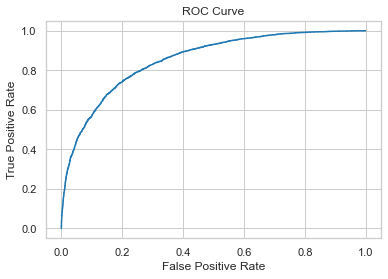

ROC AUC Score: 0.8533140002156374


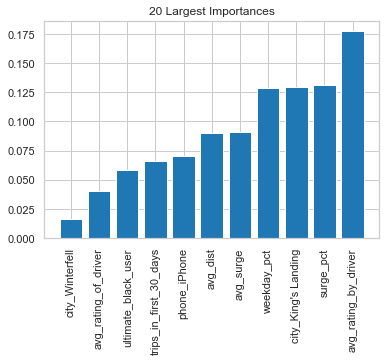

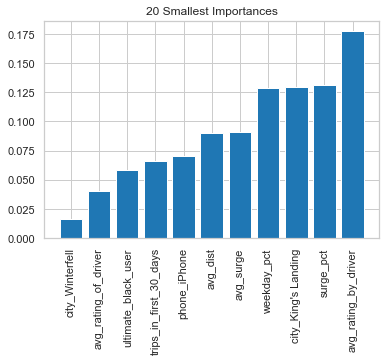

<ipython-input-175-f296ef752cd1>:63: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart_df = proba_df.groupby('Bin')['retained', 'Predicted Probability'].mean()


     Bin    Actual  Predicted  Count
0   0.05  0.020087   0.031794   1145
1    0.1  0.055643   0.074190   1276
2   0.15  0.109375   0.124626   1024
3    0.2  0.155738   0.175067    854
4   0.25  0.197895   0.225150    950
5    0.3  0.274936   0.274165    782
6   0.35  0.311813   0.324443    728
7    0.4  0.363478   0.374492    575
8   0.45  0.442424   0.424660    495
9    0.5  0.482379   0.475024    454
10  0.55  0.569915   0.525085    472
11   0.6  0.557987   0.575031    457
12  0.65  0.618852   0.625357    488
13   0.7  0.692825   0.674988    446
14  0.75  0.725926   0.725370    405
15   0.8  0.790598   0.775309    468
16  0.85  0.872611   0.824180    471
17   0.9  0.906801   0.874274    397
18  0.95  0.924012   0.924015    329
19     1  0.962162   0.969940    185


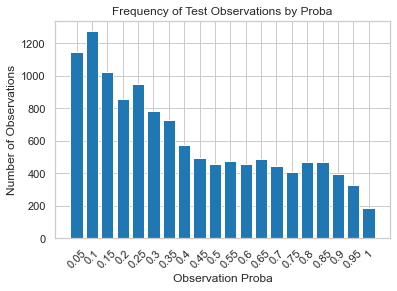

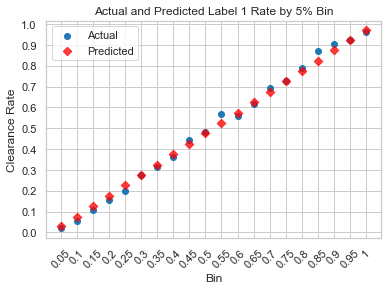

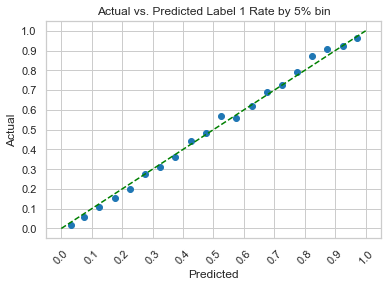

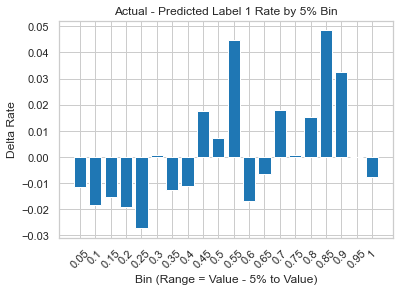

Sum of Squared Binned Residuals: 88.40166534830237
Reporting Time: 1.3 seconds


<ipython-input-152-96a6dbac1e69>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bin_df = df.groupby('Bin')['Actual', 'Predicted Probability'].mean()


In [176]:
model  = RandomForestClassifier(random_state = 33,
                            max_depth = 15,
                            n_estimators = 1000,
                            min_samples_leaf = 10)

train(model, X_train, y_train)
y_pred, y_pred_prob = predict(model, X_test)
proba_df, chart_df = reports(model, X_train.columns, y_test, y_pred, y_pred_prob)

In [168]:
model  = LogisticRegression(random_state = 33)

grid = [
        {
         'fit_intercept' : [True, False],
         'C' : np.logspace(-4, 1, 6)
        }
       ]

grid_results = grid_search(grid, model, X_train, y_train, folds = 3)
grid_results

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid Search Time: 0.5 seconds


,BSSR Rank,BSSR Mean,BSSR Std,ROC_AUC Rank,ROC_AUC Mean,ROC_AUC Std,Precision Rank,Precision Mean,Precision Std,Recall Rank,Recall Mean,Recall Std,Accuracy Rank,Accuracy Mean,Accuracy Std,F1 Rank,F1 Mean,F1 Std,Proba30 Rank,Proba30 Mean,Proba30 Std
"{'C': 0.0001, 'fit_intercept': True}",12,-7640.026224,4180.271329,12,0.755792,0.003294,1,0.719372,0.002600,12,0.677902,0.001839,12,0.677902,0.001839,12,0.608050,0.003113,6,0.046802,0.000257
"{'C': 0.0001, 'fit_intercept': False}",11,-5574.233428,956.409512,11,0.755970,0.003077,12,0.705243,0.002782,11,0.692713,0.002751,11,0.692713,0.002751,11,0.696360,0.002729,12,0.000241,0.000062
"{'C': 0.001, 'fit_intercept': True}",5,-909.525578,216.863153,10,0.761187,0.004068,2,0.715085,0.002662,1,0.719001,0.002403,1,0.719001,0.002403,5,0.702177,0.002880,1,0.082638,0.000594
"{'C': 0.001, 'fit_intercept': False}",10,-5309.591212,4209.654722,9,0.761373,0.003731,11,0.708297,0.001623,10,0.693654,0.002070,10,0.693654,0.002070,10,0.697585,0.001987,11,0.036278,0.000193
"{'C': 0.01, 'fit_intercept': True}",4,-188.954183,22.749863,8,0.761642,0.004165,3,0.711210,0.000698,2,0.717738,0.000660,2,0.717738,0.000660,4,0.706495,0.001034,2,0.079119,0.000903
"{'C': 0.01, 'fit_intercept': False}",9,-3246.808517,890.580407,4,0.761841,0.003795,7,0.709119,0.002326,9,0.695078,0.003013,9,0.695078,0.003013,9,0.698916,0.002888,10,0.044091,0.000426
"{'C': 0.1, 'fit_intercept': True}",3,-176.636054,32.816515,7,0.761643,0.004176,4,0.710931,0.000350,3,0.717577,0.000380,3,0.717577,0.000380,1,0.706890,0.000837,3,0.078308,0.000953
"{'C': 0.1, 'fit_intercept': False}",6,-2694.154340,361.262177,3,0.761849,0.003808,9,0.709103,0.002160,8,0.695347,0.002975,8,0.695347,0.002975,8,0.699141,0.002827,9,0.046278,0.000583
"{'C': 1.0, 'fit_intercept': True}",2,-175.701630,31.326685,6,0.761644,0.004179,5,0.710775,0.000570,4,0.717442,0.000574,4,0.717442,0.000574,3,0.706794,0.001019,4,0.078210,0.000958
"{'C': 1.0, 'fit_intercept': False}",8,-2702.979101,360.974931,2,0.761849,0.003811,8,0.709114,0.002399,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699234,0.003087,8,0.046514,0.000631


In [172]:
model  = LogisticRegression(random_state = 33)

grid = [
        {
         'fit_intercept' : [True, False],
         'C' : np.logspace(1, 5, 5)
        }
       ]

grid_results = grid_search(grid, model, X_train, y_train, folds = 3)
grid_results

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Grid Search Time: 0.4 seconds


,BSSR Rank,BSSR Mean,BSSR Std,ROC_AUC Rank,ROC_AUC Mean,ROC_AUC Std,Precision Rank,Precision Mean,Precision Std,Recall Rank,Recall Mean,Recall Std,Accuracy Rank,Accuracy Mean,Accuracy Std,F1 Rank,F1 Mean,F1 Std,Proba30 Rank,Proba30 Mean,Proba30 Std
"{'C': 10.0, 'fit_intercept': True}",5,-174.922007,31.444805,10,0.761645,0.004179,1,0.710774,0.000630,1,0.717442,0.000628,1,0.717442,0.000628,1,0.706802,0.001076,5,0.078192,0.000959
"{'C': 10.0, 'fit_intercept': False}",6,-2702.275895,359.683349,1,0.761850,0.003811,6,0.709100,0.002416,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699233,0.003089,10,0.046534,0.000625
"{'C': 100.0, 'fit_intercept': True}",4,-174.879435,31.463721,6,0.761645,0.004179,1,0.710774,0.000630,1,0.717442,0.000628,1,0.717442,0.000628,1,0.706802,0.001076,1,0.078199,0.000948
"{'C': 100.0, 'fit_intercept': False}",7,-2702.367826,359.774065,2,0.761849,0.003811,6,0.709100,0.002416,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699233,0.003089,9,0.046541,0.000620
"{'C': 1000.0, 'fit_intercept': True}",1,-174.723943,31.252546,7,0.761645,0.004179,1,0.710774,0.000630,1,0.717442,0.000628,1,0.717442,0.000628,1,0.706802,0.001076,2,0.078198,0.000948
"{'C': 1000.0, 'fit_intercept': False}",8,-2702.403370,359.814493,3,0.761849,0.003811,6,0.709100,0.002416,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699233,0.003089,6,0.046549,0.000614
"{'C': 10000.0, 'fit_intercept': True}",2,-174.723976,31.252582,8,0.761645,0.004179,1,0.710774,0.000630,1,0.717442,0.000628,1,0.717442,0.000628,1,0.706802,0.001076,3,0.078198,0.000948
"{'C': 10000.0, 'fit_intercept': False}",9,-2702.403550,359.814521,4,0.761849,0.003811,6,0.709100,0.002416,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699233,0.003089,7,0.046549,0.000614
"{'C': 100000.0, 'fit_intercept': True}",3,-174.723979,31.252586,8,0.761645,0.004179,1,0.710774,0.000630,1,0.717442,0.000628,1,0.717442,0.000628,1,0.706802,0.001076,4,0.078198,0.000948
"{'C': 100000.0, 'fit_intercept': False}",10,-2702.403568,359.814524,4,0.761849,0.003811,6,0.709100,0.002416,6,0.695455,0.003241,6,0.695455,0.003241,6,0.699233,0.003089,8,0.046549,0.000614


Training Time: 0.0 seconds
Prediction Time: 0.0 seconds
Confusion Matrix:
 [[6546 1187]
 [2316 2352]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      7733
           1       0.66      0.50      0.57      4668

    accuracy                           0.72     12401
   macro avg       0.70      0.68      0.68     12401
weighted avg       0.71      0.72      0.71     12401

Accuracy: 71.75 %
Log Loss: 0.5591928701401532
Brier Score Loss: 0.18801992190213365


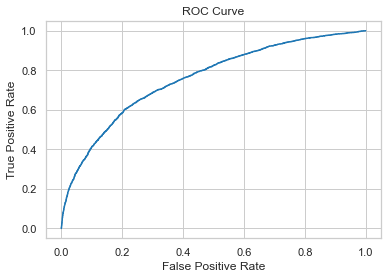

ROC AUC Score: 0.7580384747547513


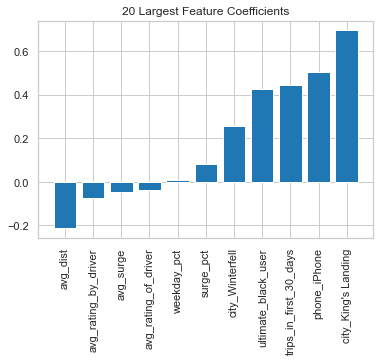

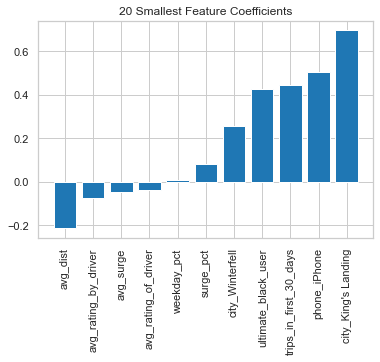

<ipython-input-175-f296ef752cd1>:63: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart_df = proba_df.groupby('Bin')['retained', 'Predicted Probability'].mean()


     Bin    Actual  Predicted  Count
0   0.05  0.071429   0.037242     42
1    0.1  0.098997   0.079579    798
2   0.15  0.121026   0.126229    975
3    0.2  0.172575   0.177082   1072
4   0.25  0.228499   0.223082   1186
5    0.3  0.274088   0.275409   1069
6   0.35  0.292921   0.323534   1229
7    0.4  0.325792   0.374287   1105
8   0.45  0.421121   0.424304    767
9    0.5  0.523425   0.475821    619
10  0.55  0.506550   0.524872    687
11   0.6  0.581690   0.575601    710
12  0.65  0.622951   0.622965    549
13   0.7  0.675362   0.672315    345
14  0.75  0.726190   0.723995    252
15   0.8  0.786486   0.776628    370
16  0.85  0.839623   0.822711    318
17   0.9  0.901408   0.870385    142
18  0.95  0.898990   0.921202     99
19     1  0.865672   0.971409     67


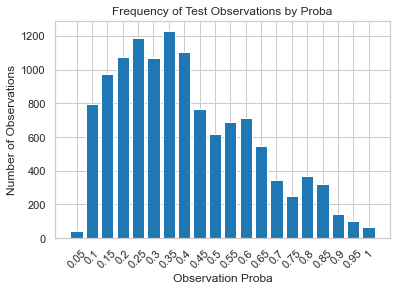

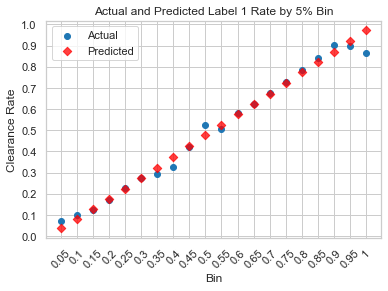

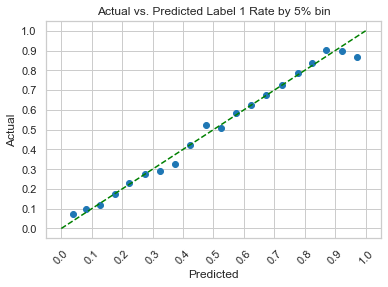

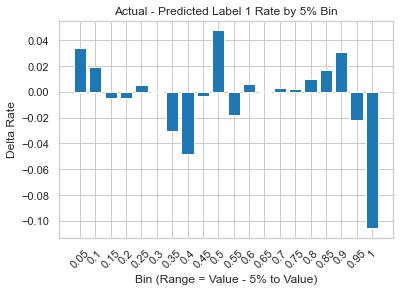

Sum of Squared Binned Residuals: 205.9551852133802
Reporting Time: 1.3 seconds


<ipython-input-152-96a6dbac1e69>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bin_df = df.groupby('Bin')['Actual', 'Predicted Probability'].mean()


In [177]:
model  = LogisticRegression(random_state = 33,
                            C = 10.0)

train(model, X_train, y_train)
y_pred, y_pred_prob = predict(model, X_test)
proba_df, chart_df = reports(model, X_train.columns, y_test, y_pred, y_pred_prob)

In [81]:
ultimate_df.retained.value_counts(normalize =True)

0.0    0.623599
1.0    0.376401
Name: retained, dtype: float64

37.6% of the users within the Ultimate dataset were classified as 'retained' at the time of the generation of the dataset.

I modeled future rider retention using classification algorithms and the newly-generated 'retained' variable. Specifically, I tried random forest and logistic regression algorithms. The random forest, with an ROC AUC of 85.3%, performs significantly better than the logistic regression, which has an ROC AUC of 75.8%. The random forest model is fairly accurate with an overall classification accuracy of 78.4% on the test set.

The model found that the most important variable for determining rider retention is 'avg_rating_by_driver', the average rating the rider has received by all drivers over all trips. This interesting insight suggests that a lot of valuable information about rider retention could be gained simply by talking to drivers. Perhaps Ultimate could conduct a survey or set of interviews to learn more about the logic drivers use when rating riders, because their ratings of drivers clearly relate to retention. Such an investigation could result in new variables to be recorded and included in the dataset in the future.